# 3.Machine Learning Classifieds Model Tour on scikit-learn
- Introduction to powerful and popular classification algorithms, logistic regression, support vector machines, and decision trees
- Using the scikit-learn machine learning library for examples and explanations
- Describe the strengths and weaknesses of classification algorithms with linear or nonlinear decision boundaries

## 3.1 Select classification algorithm

The predictive and computational performance of the classification model depends heavily on the data you want to use for training  
The five main steps for training machine learning algorithms are as follows
1. Select property and collect training samples
2. choose performance index
3. Choose a classification model and an optimization algorithm
4. Evaluate model performance
5. Tune the algorithm

## 3.2 Scikit-learn First Steps: Perceptron Training

Use only two properties from the iris dataset for visualization  
In 150 flower samples, the petal length and petal width are assigned to the characteristic matrix x, and the class labels corresponding to the corresponding flower varieties are assigned to the vector y  

In [1]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
print('Class Label:', np.unique(y))

Class Label: [0 1 2]


The np.unique (y) function returns three unique class labels stored in iris.target  
As you can see, Iris-setosa, Iris-versicolor, and Iris-virginica are already stored as integers (here: 0,1,2)  
Integer labels are recommended because they avoid small numbers and take up small memory areas, which improves computational performance  

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

Randomly split X and y arrays using the train_test_split function of the scikit-learn model_selection module  
30% will be test data, 70% will be training data  


premix the dataset before the train_test_split function splits  
Otherwise, class 0 and class 1 are in the training set, and the test set consists of only 45 samples of class 2  
Passes a fixed ramdon seed (random_state = 1) to the random_state parameter to the pseudorandom number generator used to randomly shuffle the dataset before splitting  
Fixing random_state can reproduce the result of execution  

Finally use stratification via stratify = y  
Stratification means that the train_test_split function makes the ratio of class labels in the training set and test set equal to the input data set  
You can count the number of unique values ​​in an array using the numpy bincount function  


Let's check the stratification

In [3]:
print('label count for y', np.bincount(y))

label count for y [50 50 50]


In [4]:
print('label count for y_train', np.bincount(y_train))

label count for y_train [35 35 35]


In [5]:
print('label count for y_test', np.bincount(y_test))

label count for y_test [15 15 15]


We will standardize the characteristics using the StandardScaler class from scikit-learn's preprocessing module

In [6]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

The fit method of the StandardScaler calculates $\mu$ and $\sigma$ for each feature dimension in the training set  
Calling the transform method normalizes the training set using the computed $\mu$ and $\sigma$  
Standardize the test set using the same $\mu$ and $\sigma$ so that samples from the training and test sets are moved at the same rate  

Standardize training data and train perceptron models  
Most of scikit-learn's algorithms support multiclass classifications using the OVR method  
I will inject three iris classes into the perceptron at once

In [7]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(max_iter=40, eta0=0.1, tol=1e-3, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
           fit_intercept=True, max_iter=40, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=1, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

Load the Perceptron class from the linear_model module, create a new Perceptron object, and train the model using the fit method  

Some experimentation is required to find an appropriate learning rate  
If the learning rate is too high, the algorithm goes past the global minimum  
If the learning rate is too small, the learning rate is slow, which requires a lot of epochs to converge, especially on large datasets  
Use the random_state parameter so that the results of mixing the training set per epoch are reproduced later  

You can make predictions with the predict method

In [8]:
y_pred = ppn.predict(X_test_std)
print('Misclassified Sample Count: %d' % (y_test != y_pred).sum())

Misclassified Sample Count: 1


The scikit-learn library implements various performance metrics under the metrics module  
For example, the classification accuracy of Perceptron in a test set is calculated as  

In [9]:
from sklearn.metrics import accuracy_score
print('accuracy: %.2f' % accuracy_score(y_test, y_pred))

accuracy: 0.98


Scikit-learn's classifier contains a score method that calculates the predictor's accuracy  
This method calculates the accuracy of the predict and concatenation of the accuracy_score method

In [10]:
print('accuracy: %.2f' % ppn.score(X_test_std, y_test))

accuracy: 0.98


Use plot_decision_regions to plot the boundary of the new Perceptron model to visualize how well the three iris samples are separated

In [11]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None,
                         resolution=0.02):
    
    #Set markers and colormaps
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    #Draws crystal boundaries
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')
        
    #Highlight and draw test samples
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

You can specify the test sample indices to display in the resulting graph in the modified plot_decision_regions function

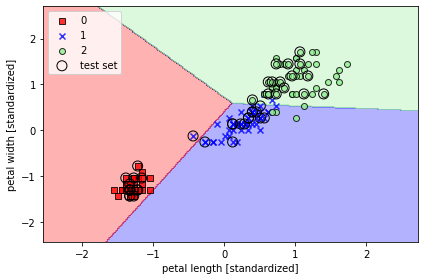

In [12]:

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=ppn, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

Three iris classes are not perfectly classified as linear decision boundaries  
Perceptron algorithm cannot converge to datasets that are not linearly separated  

## 3.3 Class Probability Modeling Using Logistic Regression

### 3.3.1 Understanding Logistic Regression and Conditional Probability

Logistic regression models are also linear models for binary classification, but can be extended to multiple classifications  
For example, use the OvR method  
To illustrate the idea behind the logistic regression model as a probabilistic model, let's first look at the odds ratio  
Odds is the probability that a particular event will occur  
The **odds ratio** can be written like $\frac {p}{(1-p)}$
$p$ is the probability that it is a positive sample  
A positive sample doesn't mean anything good, but something you want to predict  
For example, the probability of a patient having a disease  
Positive sample is a sample with class label $y = 1$  
Define the logit function by taking the logarithm to the odds ratio  
$$
logit(p)=log\frac{p}{(1-p)}
$$
The logit function takes an input between 0 and 1 and converts it to a real range value  
The linear relationship between the weighted sum of the properties and the logarithmic odds can be written as  
$$
logit(p(y=1|x))=w_{0}x_{0}+w_{1}x_{1}+\cdot \cdot \cdot+w_{m}x_{m} = \sum_{i=0}^{m}w_{i}x_{i}=w^{T}x
$$
Since it is of interest to predict the probability that a sample will belong to a particular class, we reverse the logit function  
This function is called **logistic sigmoid function**  
$$
\phi(z)=\frac{1}{1+e^{-z}}
$$
Where z is the final input consisting of a linear combination of weights and sample properties  
$z=w^{T}x=w_{0}x_{0}+w_{1}x_{1}+\cdot \cdot \cdot+w_{m}x_{m}$

Let's draw what the sigmoid function looks like

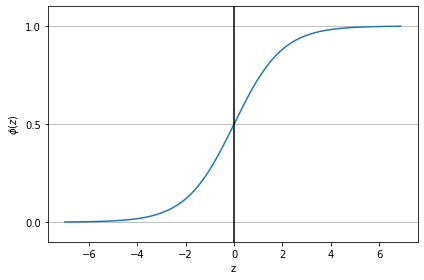

In [13]:
import matplotlib.pyplot as plt
import numpy as np
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))
z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)
plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')
#Grid and grid lines on the y-axis
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()

I used the identity function $\phi(z) = z$ as the activation function in adaline  
In logistic regression, the sigmoid function defined above becomes the activation function  
- difference of Adaline and logistic regression
<img src='https://www.safaribooksonline.com/library/view/python-machine-learning/9781787125933/graphics/B07030_03_03.jpg'>

Interpret the output of the sigmoid function given by the property $x$ multiplied by the weight $w$ as the probability $\phi(z)=P(y=1|x;w)$ that a particular sample belongs to class 1  
The prediction probability can be easily converted to binary output using a critical function  
$$
\widehat{y}=\begin{cases}
1\quad\phi(z)\geq0.5\\ 
0\quad etc
\end{cases}
$$
If you look at the previous sigmoid function graph, you can see that it is the same as the following:  
$$
\widehat{y}=\begin{cases}
1\quad(z)\geq0.0\\ 
0\quad etc
\end{cases}
$$

### 3.2.2 Weights Learning of Rogistic Cost Function
Now let's take a quick look at how to learn the model parameter $w$  
In the previous chapter, we defined the sum of squared errors cost function  
$$
J(w)=\sum_{i}\frac{1}{2}(\phi(z^{(i)})-y^{(i)})^{2}
$$
Learn the weights w to minimize this function in the Adalan classification model  
To illustrate how to derive the cost function of logistic regression, we will first define the likelihood $L$ that we want to maximize when creating a logistic regression model  
Suppose each sample in a dataset is independent of each other
$$
L(w)=P(y|x;y)=\prod_{i=1}^{n}P(y^{(i)}|x^{(i)};w)=\prod_{i=1}^{n}(\phi(z^{(i)}))^{y^{(i)}}(1-\phi(z^{(i)}))^{1-y^{(i)}}
$$
In practice, it is easier to maximize the log of this formula  
This function is called the log likelihood function
$$
l(w)=\log L(w)=\sum_{i=1}^{n}\left[y^{(i)}\log\left(\phi\left(z^{(i)}\right)\right)+\left(1-y^{(i)}\right)\log\left(1-\phi\left(z^{(i)}\right)\right)\right]
$$
Using a logarithmic function prevents numerical underflow that occurs when the probability is very small  
The product of coefficients can be replaced by the sum of the coefficients  
This makes it easier to find derivatives  
You can maximize this log likelihood function by using optimization algorithms such as gradient rise  
Alternatively, the log likelihood function can be expressed again as the cost function $J$, which can be minimized using gradient descent  
$$
J(w)=\sum_{i=1}^{n}\left[-y^{(i)}\log\left(\phi\left(z^{(i)}\right)\right)-\left(1-y^{(i)}\right)\log\left(1-\phi\left(z^{(i)}\right)\right)\right]
$$
To better understand this cost function, let's calculate the cost when there is only one sample  
$$
J\left(\phi\left(z\right),y;w\right)=-y\log\left(\phi\left(z\right)\right)-\left(1-y\right)\log\left(1-\phi\left(z\right)\right)
$$
In the equation, the first term is 0 when $y = 0$  
If $y = 1$, the second term is 0  
$$
J\left(\phi\left(z\right),y;w\right)=\begin{cases}
-\log\left(\phi\left(z\right)\right)\quad y=1\\
-\log\left(1-\phi\left(z\right)\right)\quad y=0
\end{cases}
$$
If we have one sample, let's draw a classification cost for the $\phi\left(z\right)$ value

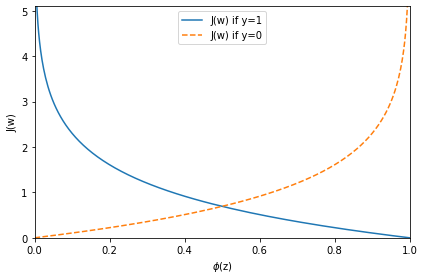

In [14]:
def cost_1(z):
    return - np.log(sigmoid(z))
def cost_0(z):
    return - np.log(1 - sigmoid(z))
z=np.arange(-10, 10, 0.1)
phi_z = sigmoid(z)
c1 = [cost_1(x) for x in z]
plt.plot(phi_z, c1, label='J(w) if y=1')
c0 = [cost_0(x) for x in z]
plt.plot(phi_z, c0, linestyle='--', label='J(w) if y=0')
plt.ylim(0.0, 5.1)
plt.xlim([0, 1])
plt.xlabel('$\phi$(z)')
plt.ylabel('J(w)')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

Incorrect forecasting leads to infinite costs  
It's important to give more and more cost to the wrong side

### 3.3.3 Changed Adaline Implementation to Logistic Regression Algorithm

To implement logistic regression, replace the cost function $J$ with a new cost function in the adaline implementation  
$$
J\left(w\right)=-\sum_{i}\left[y^{(i)}\log\left(\phi\left(z^{(i)}\right)\right)+\left(1-y^{(i)}\right)\log\left(1-\phi\left(z^{(i)}\right)\right)\right]
$$
This function calculates the cost of classifying all training samples per epoch  
Change the linear activation function to sigmoid activation and change the threshold to return 0 and 1 instead of the class labels -1 and 1  
Incorporating these three into the Adalin code gives a logistic regression  

In [15]:
class LogisticRegressionGD(object):
    """Logistic Regression Classifier Using Gradient Descent
    
    parameter
    -------------
    eta : float
        running rate (between 0.0 and 1.0)
    n_iter : int
        training dataset iterations
    random_state : int
        random number generator seed for weight randomization
    
    property
    ------------
    w_ : 1d-array
        learned weights
    errors_ :list
        cumulative classification error per epoch
        
    """
    def __init__(self, eta=0.05, n_iter=100, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, X, y):
        """Training data learning
        
        parameter
        ------------
        X : {array-like}, shape = [n_samples, n_features]
            Training data consisting of n_samples samples and n_features characteristics
        y : array-like, shape = [n_samples]
            target value
            
        Conversion value
        -------
        self : object
        
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01,
                             size=1 + X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            
            #Calculate logistic cost instead of sum of squared errors
            cost = (-y.dot(np.log(output)) -
                    ((1-y).dot(np.log(1-output))))
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        """final input calculation"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, z):
        """Logistic Sigmoid Activation Calculation"""
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))
    
    def predict(self, X):
        """Return class label using unit step function"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)
        # == return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

Logistic models implemented directly here can only be applied to binary classification models

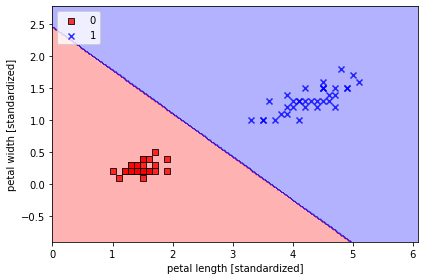

In [16]:
X_train_01_subset = X_train[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]
lrgd = LogisticRegressionGD(eta=0.05,
                           n_iter=1000,
                           random_state=1)
lrgd.fit(X_train_01_subset,
        y_train_01_subset)
plot_decision_regions(X=X_train_01_subset,
                     y=y_train_01_subset,
                     classifier=lrgd)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

### 3.3.4 Training logistic regression models using scikit-learn

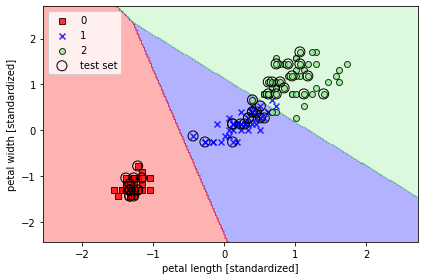

In [17]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear', multi_class='auto',
                       C=100.0, random_state=1)
lr.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std,
                     y_combined,
                     classifier=lr,
                     test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

The probability that a training sample belongs to a class is calculated using the predict_proba method

In [18]:
lr.predict_proba(X_test_std[:3, :])

array([[3.17983737e-08, 1.44886616e-01, 8.55113353e-01],
       [8.33962295e-01, 1.66037705e-01, 4.55557009e-12],
       [8.48762934e-01, 1.51237066e-01, 4.63166788e-13]])

If you add up all the columns, you get 1

In [19]:
lr.predict_proba(X_test_std[:3, :]).sum(axis=1)

array([1., 1., 1.])

The column with the largest value in the row becomes the prediction class label

In [20]:
lr.predict_proba(X_test_std[:3, :]).argmax(axis=1)

array([2, 0, 0], dtype=int64)

You can check quickly using the predict method

In [21]:
lr.predict(X_test_std[:3,:])

array([2, 0, 0])

scikit-learn expects a two-dimensional array as input data  
One row must be converted to two-dimensional format first  
One way to convert a row into a two-dimensional array is to add a new dimension using the Numpy reshape method

In [22]:
lr.predict(X_test_std[0, :].reshape(1,-1))

array([2])

### 3.3.5 Use Regulation to Avoid Overfitting
Overfitting is a common problem in machine learning  
The model works well with the training data, but it is not very generalized with the data you have never seen before  
That the variance is large when the model is overfitting  
Because there are too many model parameters to make the model too complex from the given data  
Similarly, sometimes the model is underfitting  
This means that the model is not complex enough to detect patterns in the training data
<img src='https://miro.medium.com/max/824/1*JZbxrdzabrT33Yl-LrmShw.png'>  
One way to find a good bias-distributed tradeoff is to use regulation to adjust the complexity of the model  
The most widely used form of regulation is the following L2 regulations:  
$$
\frac{\lambda}{2}\left\| w\right\|^{2}=\frac{\lambda}{2}\sum_{j=1}^{m}w_{j}^{2}
$$
In this expression, $\lambda$ is the regulatory hyperparameter  
Cost function of logistic regression applies regulation by adding regulatory terms  
Regulatory terms reduce weight in model training  
$$
J(w)=\sum_{i=1}^{n}\left[-y^{(i)}\log\left(\phi\left(z^{(i)}\right)\right)-\left(1-y^{(i)}\log\left(1-\phi\left(z^{(i)} \right) \right) \right) \right]+\frac{\lambda}{2}\left\|w\right\|^{2}
$$
You can use $\lambda$ to adjust how well it fits your training data while keeping the weights small  
Increasing $\lambda$ increases regulatory strength  

The parameter c is the inverse of $\lambda$  
As a result, decreasing the value of c increases the regulatory strength  

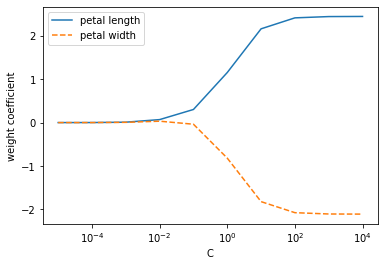

In [24]:
weights, params = [], []
for c in np.arange(-5, 5):
    lr = LogisticRegression(solver='liblinear', multi_class='auto', C=10.**c,random_state=1)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)
weights = np.array(weights)
plt.plot(params, weights[:, 0], label='petal length')
plt.plot(params, weights[:, 1], linestyle='--', label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()

## 3.4 Maximum Margin Classification Using Support Vector Machines

SVM's optimization target is to maximize margins  

<img src='https://static.packt-cdn.com/products/9781783555130/graphics/3547_03_07.jpg'>